In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

# Data Columns

In [3]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# Data Info

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Nulls / NA

In [5]:
print(train_df.isna().sum())
print(test_df.isna().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


# Convert datetime to useful information

In [6]:
train_df["datetime"] = pd.to_datetime(train_df["datetime"])
test_df["datetime"] = pd.to_datetime(test_df["datetime"])

In [7]:
def add_datetime_features(df):
    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["hour"] = df["datetime"].dt.hour
    df["minute"] = df["datetime"].dt.minute
    df["dayofweek"] = df["datetime"].dt.dayofweek

In [8]:
add_datetime_features(train_df)
add_datetime_features(test_df)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

# Analysis

First we would like to plot the target variable and check for outliers.

<AxesSubplot:xlabel='count', ylabel='Count'>

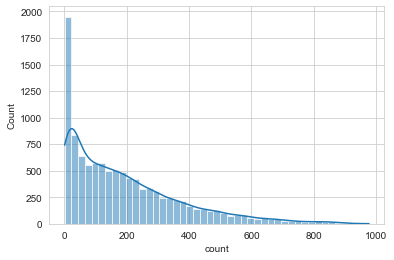

In [10]:
sns.histplot(x="count", data=train_df, kde=True)

In the plot above we can see that the target variable is right skewed, let's look on the log-likelihood of count

In [11]:
train_df["log_count"] = np.log(train_df["count"] + 1)

<AxesSubplot:xlabel='log_count', ylabel='Count'>

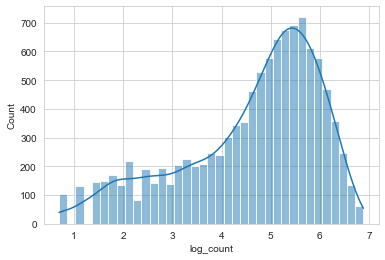

In [12]:
sns.histplot(x="log_count", data=train_df, kde=True)

Let's look on registered and casual as well.

<AxesSubplot:xlabel='casual', ylabel='Count'>

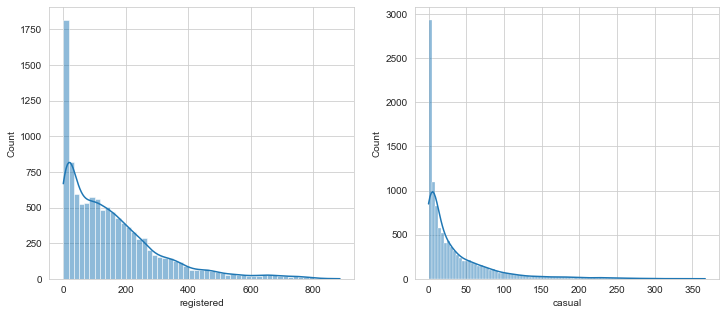

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(x="registered", data=train_df, kde=True, ax=ax[0])
sns.histplot(x="casual", data=train_df, kde=True, ax=ax[1])

Same observation as above. Let's look at the log-likelihood

In [14]:
train_df["log_registered"] = np.log(train_df["registered"] + 1)
train_df["log_casual"] = np.log(train_df["casual"] + 1)

<AxesSubplot:xlabel='log_casual', ylabel='Count'>

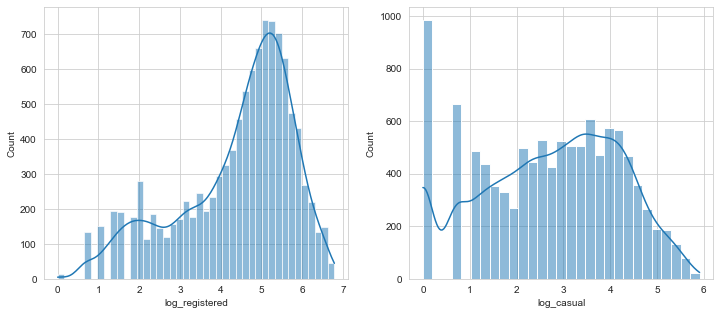

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(x="log_registered", data=train_df, kde=True, ax=ax[0])
sns.histplot(x="log_casual", data=train_df, kde=True, ax=ax[1])

Check outliers

<AxesSubplot:ylabel='log_casual'>

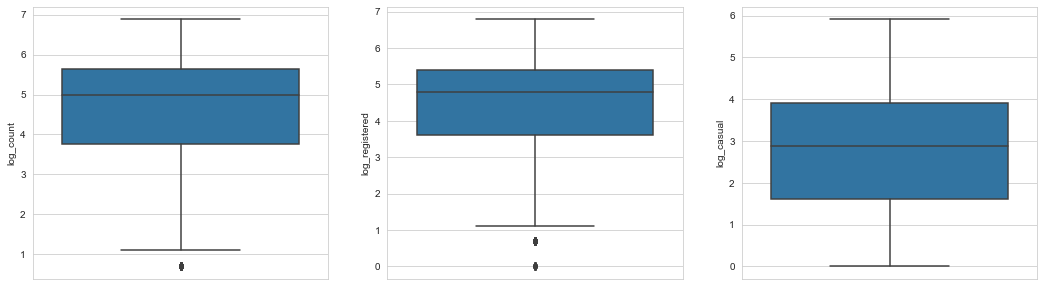

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.boxplot(y="log_count", data=train_df, ax=ax[0])
sns.boxplot(y="log_registered", data=train_df, ax=ax[1])
sns.boxplot(y="log_casual", data=train_df, ax=ax[2])

In [17]:
def scatter_attribute_effect(attr):
    fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(24, 5))
    fig.suptitle(f"{attr}")
    sns.scatterplot(data=train_df, x=attr, y="registered", ax=axis[0], color="blue")
    sns.scatterplot(data=train_df, x=attr, y="casual", ax=axis[1], color="red")
    sns.scatterplot(data=train_df, x=attr, y="count", ax=axis[2], color="green")
    plt.show()

def hist_attribute_effect(attr):
    fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(24, 5))
    fig.suptitle(f"{attr}")
    sns.histplot(data=train_df, x=attr, y="registered", ax=axis[0], bins=10, color="blue", kde=True)
    sns.histplot(data=train_df, x=attr, y="casual", ax=axis[1], bins=10, color="red", kde=True)
    sns.histplot(data=train_df, x=attr, y="count", ax=axis[2], bins=10, color="green", kde=True)
    sns.histplot(data=train_df, x=attr, ax=axis[3], bins=10, color="pink", kde=True)
    plt.show()

def boxplot_attribute_effect(attr):
    fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(24, 5))
    fig.suptitle(f"{attr}")
    sns.boxplot(data=train_df, x=attr, y="registered", ax=axis[0], color="blue")
    sns.boxplot(data=train_df, x=attr, y="casual", ax=axis[1], color="red")
    sns.boxplot(data=train_df, x=attr, y="count", ax=axis[2], color="green")
    plt.show()

Let's remove outliers

In [18]:
def remove_outliers_iqr(df, feature, wisk=1.5):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    mask = (df[feature] >= q1 - wisk * iqr) & (df[feature] <= q3 + wisk * iqr)
    return df[mask]
train_df = remove_outliers_iqr(train_df, "log_count")
train_df = remove_outliers_iqr(train_df, "log_registered")

<AxesSubplot:ylabel='log_casual'>

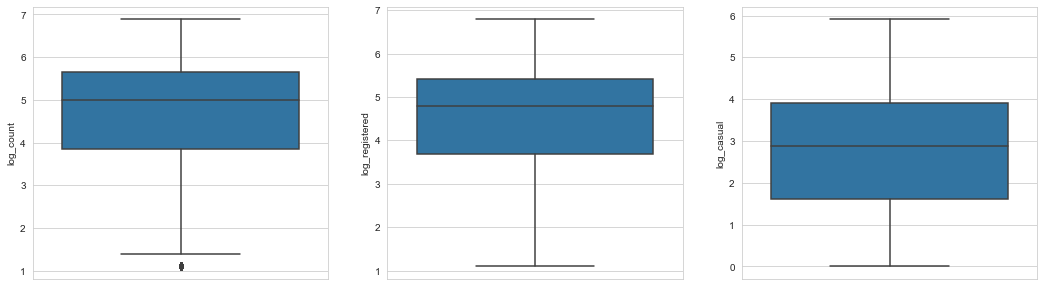

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.boxplot(y="log_count", data=train_df, ax=ax[0])
sns.boxplot(y="log_registered", data=train_df, ax=ax[1])
sns.boxplot(y="log_casual", data=train_df, ax=ax[2])

Let's check for correlations in the data

In [20]:
train_df.drop(["minute"], inplace=True, axis=1)
test_df.drop("minute", inplace=True, axis=1)

In [21]:
for col in train_df.columns:
    boxplot_attribute_effect(col)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fdee9a64700> (for post_execute):


KeyboardInterrupt: 

# data description
datetime - hourly date + timestamp
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

1. season - casual users tend to rent bikes on the summer and fall. Registered users tend to use on the summer, fall and winter. Less on the fall.
2. holiday - casual users tend to use on holidays, registered users tend to use on working-days, non holidays.
3. workingday - same observation as above, causal users use more on holidays (non-working days). Registered users tend to use on workingdays.
4. Weather - All users are likely to rent the bikes on a clear weather and mist. when it is snowing the renting demands basically vanishes..
5. temp - causal users don't rent bikes on cold days.
6. humidity - people like to use more on low humidity.
7. windspeed - people don't like to use the bikes when the wind speed is very high.
8. year - 2012 was better than 2011.
9. month - less demand on the winter January and February. Casual users use more on 4-10 month.
10. day - need to be ignored as it contains the first 18days of each month (train set) the reset is the test set.
11. hour - we see peaks on registered days on: 7-9 and 16-19 (arrive and leave work). On the other hand, casual users use more on 10-18.
12. dayofweek - casual users use more frequently on the weekends.

<AxesSubplot:>

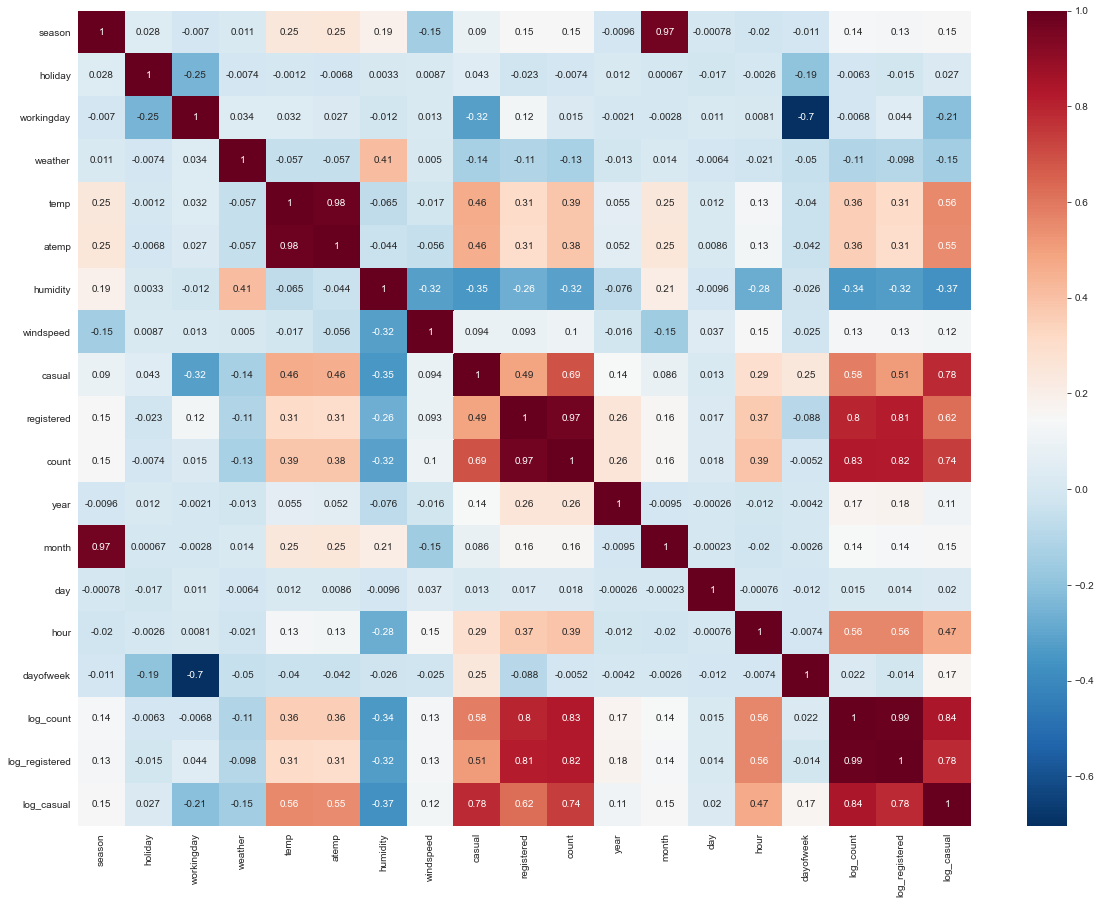

In [21]:
plt.figure(figsize=(20, 15))
features = train_df.columns
corr_matrix = train_df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r")

In [ ]:
abs_corr_matrix = corr_matrix.abs()
columns = corr_matrix.abs().columns
skip = ["log_casual", "log_registered", "log_count", "registered", "casual", "count", "day", "atemp"]
for i in range(len(columns)):
    if columns[i] in skip:
        continue
    for j in range(i+1, len(columns)):
        if columns[j] in skip:
            continue
        x, y = columns[i], columns[j]
        print(x, y)
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
        fig.suptitle(f"{x} {y}")
        sns.scatterplot(data=train_df, x=x, y=y, hue="count", alpha=0.2, ax=ax[0], palette="rainbow",)
        sns.scatterplot(data=train_df, x=x, y=y, hue="registered", alpha=0.2, ax=ax[1], palette="rainbow")
        sns.scatterplot(data=train_df, x=x, y=y, hue="casual", alpha=0.2, ax=ax[2], palette="rainbow")
        plt.show()

## Feature engineering:
1. replace windspeed=0 with month windspeed median.
2. combine workingday and hour features
3. combine workingday and temp features
4. combine workingday and humidty features
3. combine humidity and month features
3. combine humidity and windspeed features
4. combine temp and hour features - working hours + good temp == high demand.
5. combine temp and month features - as the temp is higher within the month, the demand is higher.
6. combine humidity and weather features - lower humidity higher demand.
7. combine humidity and season features.
8. combine humidity and temp features.
9. combine humidity and dayofweek features.
10. combine humidity and hour features.
11. combine month and hour features.
12. combine hour and dayofweek features.

In [21]:
month_windspeed = train_df[train_df["windspeed"] > 0 ][["month", "windspeed"]].groupby('month').mean().reset_index()

In [22]:
month_windspeed.columns = ["month", "month_windspeed"]

In [23]:
train_df = train_df.merge(month_windspeed, on="month", how="left")
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,hour,dayofweek,log_count,log_registered,log_casual,month_windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,16,2011,1,1,0,5,2.833213,2.639057,1.386294,16.009401
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,40,2011,1,1,1,5,3.713572,3.496508,2.197225,16.009401
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,32,2011,1,1,2,5,3.496508,3.332205,1.791759,16.009401
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,13,2011,1,1,3,5,2.639057,2.397895,1.386294,16.009401
4,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,3,2011,1,1,7,5,1.386294,1.098612,0.693147,16.009401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10731,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,336,2012,12,19,19,2,5.820083,5.799093,2.079442,13.047870
10732,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,241,2012,12,19,20,2,5.488938,5.446737,2.397895,13.047870
10733,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,168,2012,12,19,21,2,5.129899,5.105945,1.609438,13.047870
10734,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,129,2012,12,19,22,2,4.867534,4.770685,2.564949,13.047870


In [24]:
mask = train_df["windspeed"] == 0
train_df["windspeed"][mask] = train_df["month_windspeed"][mask]

<ipython-input-24-7f590af4e37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["windspeed"][mask] = train_df["month_windspeed"][mask]


In [25]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,hour,dayofweek,log_count,log_registered,log_casual,month_windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,16.009401,3,...,16,2011,1,1,0,5,2.833213,2.639057,1.386294,16.009401
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,16.009401,8,...,40,2011,1,1,1,5,3.713572,3.496508,2.197225,16.009401
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,16.009401,5,...,32,2011,1,1,2,5,3.496508,3.332205,1.791759,16.009401
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,16.009401,3,...,13,2011,1,1,3,5,2.639057,2.397895,1.386294,16.009401
4,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,16.009401,1,...,3,2011,1,1,7,5,1.386294,1.098612,0.693147,16.009401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10731,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,...,336,2012,12,19,19,2,5.820083,5.799093,2.079442,13.047870
10732,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,...,241,2012,12,19,20,2,5.488938,5.446737,2.397895,13.047870
10733,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,...,168,2012,12,19,21,2,5.129899,5.105945,1.609438,13.047870
10734,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,...,129,2012,12,19,22,2,4.867534,4.770685,2.564949,13.047870


In [26]:
test_df = test_df.merge(month_windspeed, on="month", how="left")
mask = test_df["windspeed"] == 0
test_df["windspeed"][mask] = test_df["month_windspeed"][mask]
# test_df.loc[mask, 'windspeed'] = test_df.loc[mask, 'month_windspeed']

<ipython-input-26-37f9cce02d20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["windspeed"][mask] = test_df["month_windspeed"][mask]


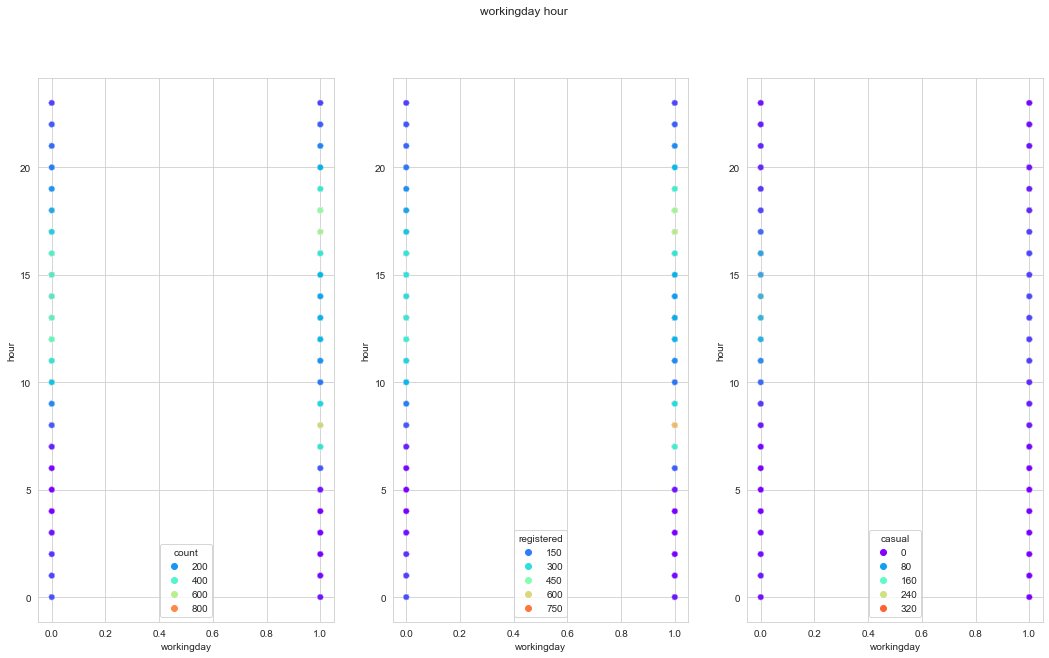

In [27]:
x, y = "workingday", "hour"
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
fig.suptitle(f"{x} {y}")
sns.scatterplot(data=train_df, x=x, y=y, hue="count", alpha=0.2, ax=ax[0], palette="rainbow",)
sns.scatterplot(data=train_df, x=x, y=y, hue="registered", alpha=0.2, ax=ax[1], palette="rainbow")
sns.scatterplot(data=train_df, x=x, y=y, hue="casual", alpha=0.2, ax=ax[2], palette="rainbow")
plt.show()

In [28]:
workingday_hour = train_df[["workingday", "hour", "casual", "registered"]].groupby(["workingday", "hour"]).median().reset_index()
workingday_hour.columns = ["workingday", "hour", "workingday_hour_casual", "workingday_hour_registered"]
train_df = train_df.merge(workingday_hour, on=["workingday", "hour"], how="left")
test_df = test_df.merge(workingday_hour, on=["workingday", "hour"], how="left")

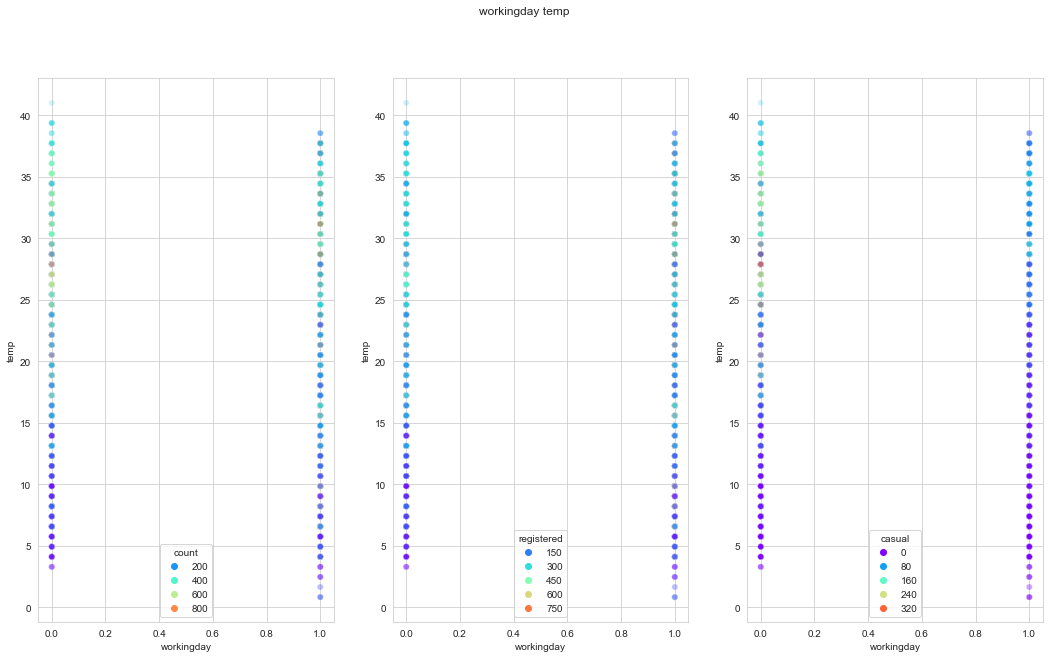

In [29]:
def plot_feature_pair(x, y):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
    fig.suptitle(f"{x} {y}")
    sns.scatterplot(data=train_df, x=x, y=y, hue="count", alpha=0.2, ax=ax[0], palette="rainbow",)
    sns.scatterplot(data=train_df, x=x, y=y, hue="registered", alpha=0.2, ax=ax[1], palette="rainbow")
    sns.scatterplot(data=train_df, x=x, y=y, hue="casual", alpha=0.2, ax=ax[2], palette="rainbow")
    plt.show()

plot_feature_pair("workingday", "temp")

In [30]:
def temp_scale_map(x):
    if x["temp"] < 15:
        return 1
    elif x["temp"] < 30:
        return 2
    else:
        return 3

train_df["temp_scale"] = train_df[["temp"]].apply(temp_scale_map, axis=1)
test_df["temp_scale"] = test_df[["temp"]].apply(temp_scale_map, axis=1)
temp_workingday = train_df[["temp_scale", "workingday", "registered", "casual"]].groupby(["temp_scale", "workingday"]).median().reset_index()
temp_workingday.columns = ["temp_scale", "workingday", "temp_scale_workingday_registered", "temp_scale_workingday_casual"]
train_df = train_df.merge(temp_workingday, on=["temp_scale", "workingday"], how="left")
test_df = test_df.merge(temp_workingday, on=["temp_scale", "workingday"], how="left")

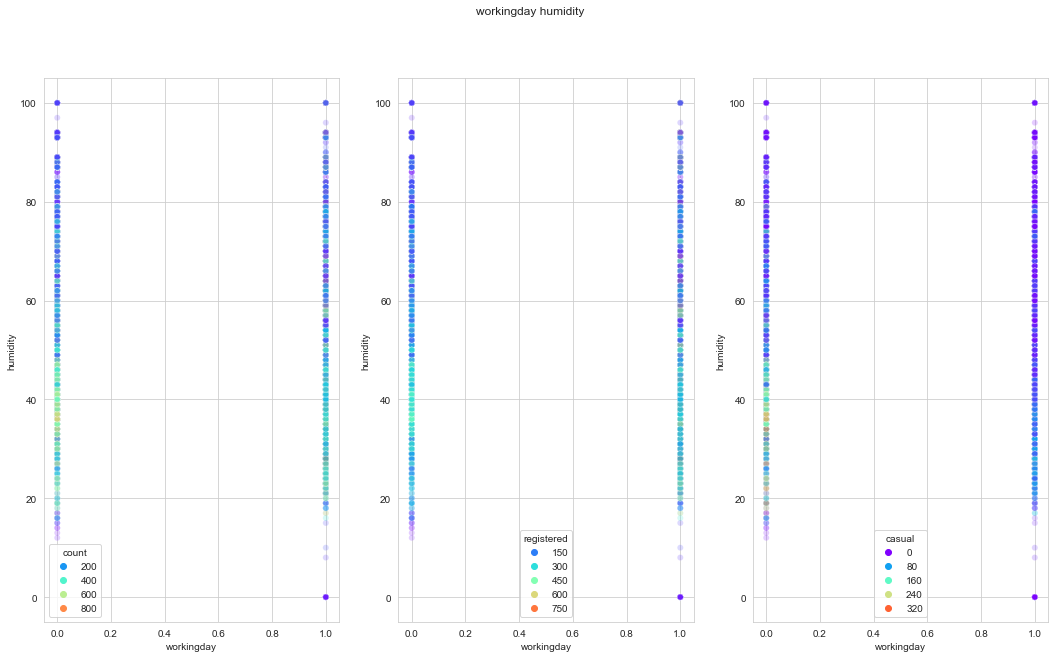

In [31]:
plot_feature_pair("workingday", "humidity")

In [32]:
def humidity_scale_map(x):
    if x["humidity"] < 20:
        return 1
    elif x["humidity"] < 25:
        return 2
    elif x["humidity"] < 30:
        return 3
    elif x["humidity"] < 35:
        return 4
    elif x["humidity"] < 40:
        return 5
    elif x["humidity"] < 45:
        return 6
    else:
        return 7

train_df["humidity_scale"] = train_df[["humidity"]].apply(humidity_scale_map, axis=1)
test_df["humidity_scale"] = test_df[["humidity"]].apply(humidity_scale_map, axis=1)
humidity_workingday = train_df[["humidity_scale", "workingday", "registered", "casual"]].groupby(["humidity_scale", "workingday"]).median().reset_index()
humidity_workingday.columns = ["humidity_scale", "workingday", "humidity_scale_workingday_registered", "humidity_scale_workingday_casual"]
train_df = train_df.merge(humidity_workingday, on=["humidity_scale", "workingday"], how="left")
test_df = test_df.merge(humidity_workingday, on=["humidity_scale", "workingday"], how="left")

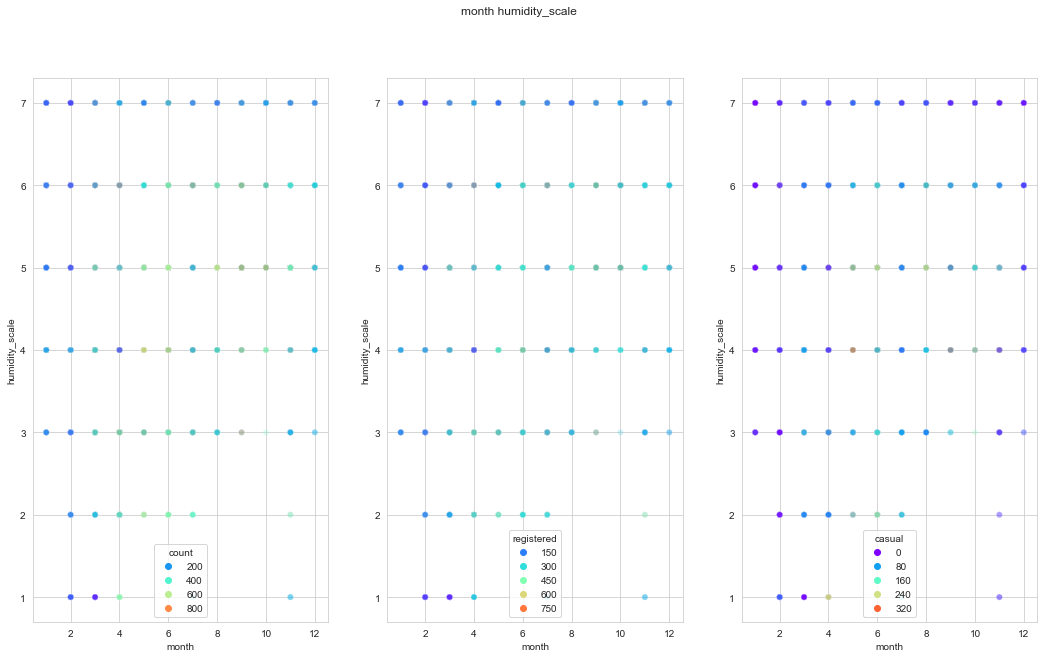

In [33]:
plot_feature_pair("month", "humidity_scale")

In [34]:
humidity_month = train_df[["humidity_scale", "month", "registered", "casual"]].groupby(["humidity_scale", "month"]).median().reset_index()
humidity_month.columns = ["humidity_scale", "month", "humidity_scale_month_registered", "humidity_scale_month_casual"]
train_df = train_df.merge(humidity_month, on=["humidity_scale", "month"], how="left")
test_df = test_df.merge(humidity_month, on=["humidity_scale", "month"], how="left")

In [35]:
def windspeed_scale_map(x):
    if x["windspeed"] < 10:
        return 1
    elif x["windspeed"] < 20:
        return 2
    elif x["windspeed"] < 30:
        return 3
    else:
        return 4

train_df["windspeed_scale"] = train_df[["windspeed"]].apply(windspeed_scale_map, axis=1)
test_df["windspeed_scale"] = test_df[["windspeed"]].apply(windspeed_scale_map, axis=1)

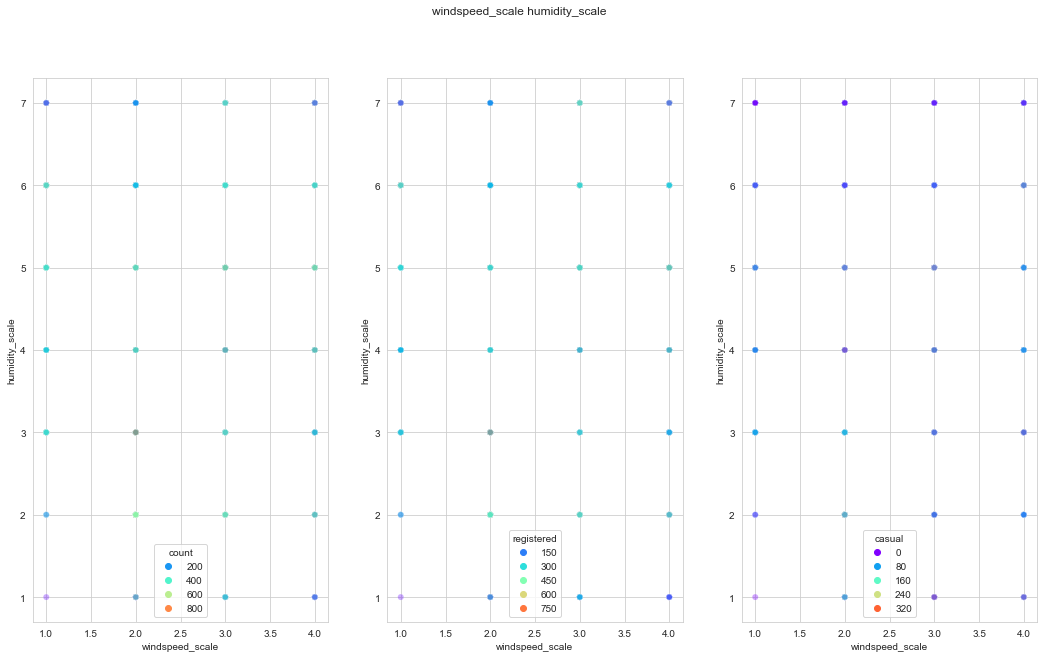

In [36]:
plot_feature_pair("windspeed_scale", "humidity_scale")

In [37]:
humidity_windspeed = train_df[["humidity_scale", "windspeed_scale", "registered", "casual"]].groupby(["humidity_scale", "windspeed_scale"]).median().reset_index()
humidity_windspeed.columns = ["humidity_scale", "windspeed_scale", "humidity_windspeed_registered", "humidity_windspeed_casual"]
train_df = train_df.merge(humidity_windspeed, on=["humidity_scale", "windspeed_scale"], how="left")
test_df = test_df.merge(humidity_windspeed, on=["humidity_scale", "windspeed_scale"], how="left")

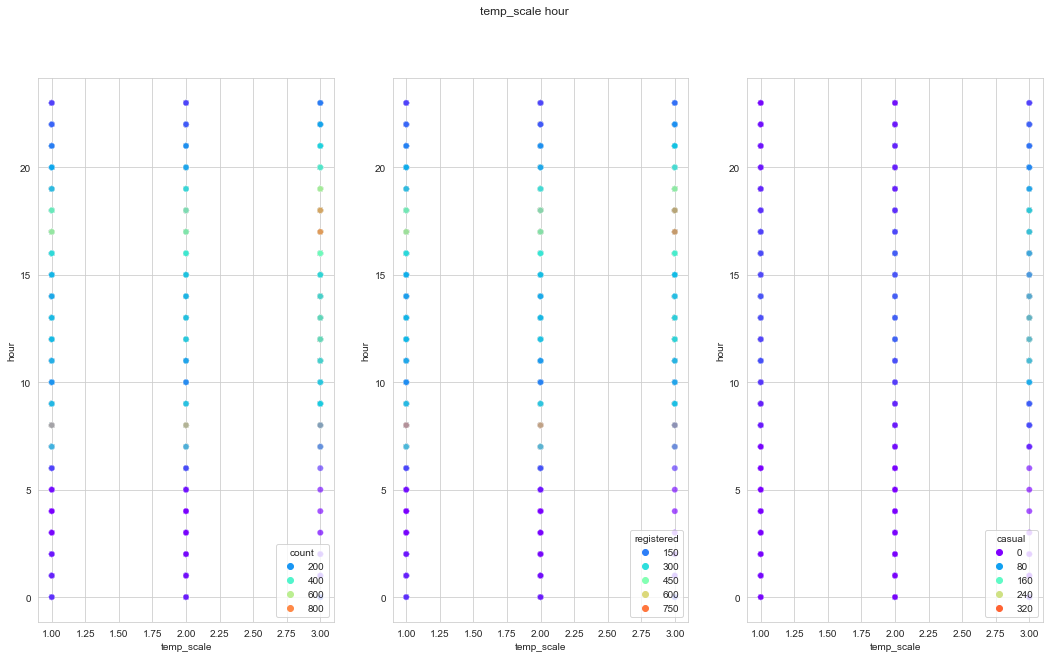

In [38]:
plot_feature_pair("temp_scale", "hour")

In [39]:
temp_hour = train_df[["temp_scale", "hour", "registered", "casual"]].groupby(["temp_scale", "hour"]).median().reset_index()
temp_hour.columns = ["temp_scale", "hour", "temp_hour_registered", "temp_hour_casual"]
train_df = train_df.merge(temp_hour, on=["temp_scale", "hour"], how="left")
test_df = test_df.merge(temp_hour, on=["temp_scale", "hour"], how="left")

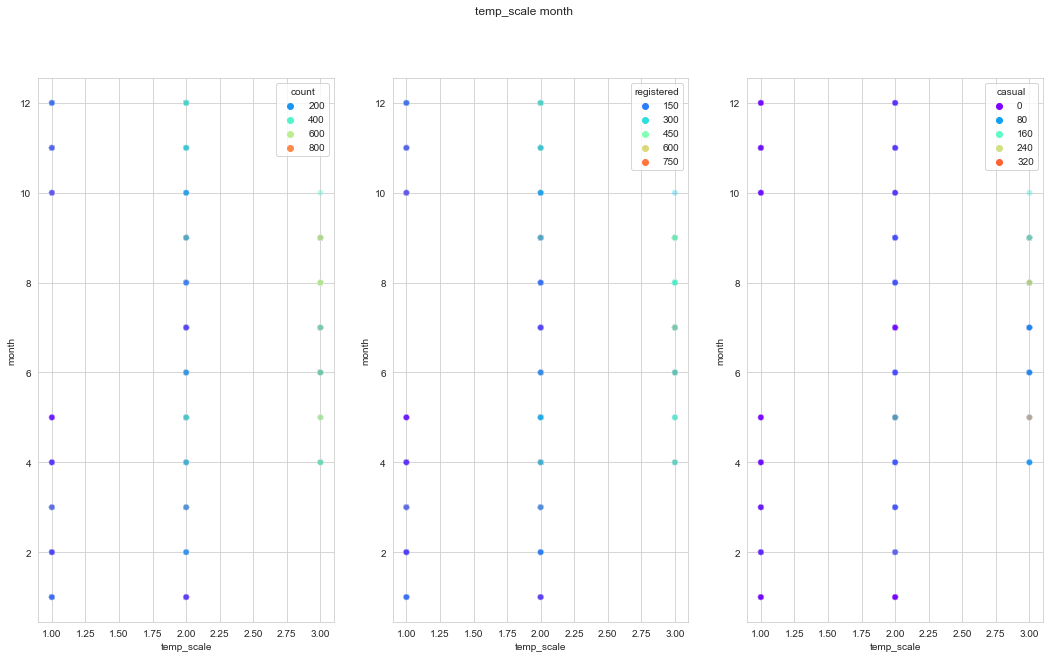

In [40]:
plot_feature_pair("temp_scale", "month")

In [41]:
temp_month = train_df[["temp_scale", "month", "registered", "casual"]].groupby(["temp_scale", "month"]).median().reset_index()
temp_month.columns = ["temp_scale", "month", "temp_month_registered", "temp_month_casual"]
train_df = train_df.merge(temp_month, on=["temp_scale", "month"], how="left")
test_df = test_df.merge(temp_month, on=["temp_scale", "month"], how="left")

In [42]:
train_df.isna().sum()

datetime                                0
season                                  0
holiday                                 0
workingday                              0
weather                                 0
temp                                    0
atemp                                   0
humidity                                0
windspeed                               0
casual                                  0
registered                              0
count                                   0
year                                    0
month                                   0
day                                     0
hour                                    0
dayofweek                               0
log_count                               0
log_registered                          0
log_casual                              0
month_windspeed                         0
workingday_hour_casual                  0
workingday_hour_registered              0
temp_scale                        

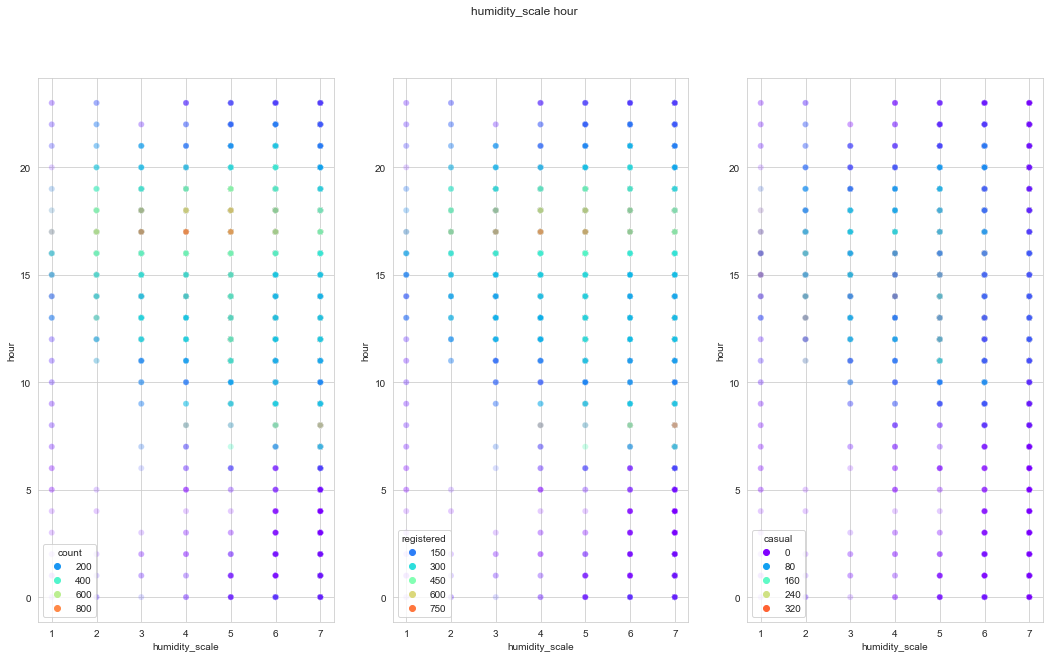

In [43]:
plot_feature_pair("humidity_scale", "hour")

In [44]:
humidity_hour = train_df[["humidity_scale", "hour", "registered", "casual"]].groupby(["humidity_scale", "hour"]).median().reset_index()
humidity_hour.columns = ["humidity_scale", "hour", "humidity_hour_registered", "humidity_hour_casual"]
train_df = train_df.merge(humidity_hour, on=["humidity_scale", "hour"], how="left")
test_df = test_df.merge(humidity_hour, on=["humidity_scale", "hour"], how="left")

In [45]:
test_df.isna().sum()

datetime                                0
season                                  0
holiday                                 0
workingday                              0
weather                                 0
temp                                    0
atemp                                   0
humidity                                0
windspeed                               0
year                                    0
month                                   0
day                                     0
hour                                    0
dayofweek                               0
month_windspeed                         0
workingday_hour_casual                  0
workingday_hour_registered              0
temp_scale                              0
temp_scale_workingday_registered        0
temp_scale_workingday_casual            0
humidity_scale                          0
humidity_scale_workingday_registered    0
humidity_scale_workingday_casual        0
humidity_scale_month_registered   

In [46]:
test_df_median = test_df.median()

<ipython-input-46-f7ce6d354da6>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_df_median = test_df.median()


In [47]:
for col, na_count in test_df.isna().sum().items():
    if na_count > 0:
        test_df[col].fillna(value=test_df_median[col], inplace=True)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import StratifiedKFold

In [23]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek', 'log_count',
       'log_registered', 'log_casual'],
      dtype='object')

In [24]:
def write_submission(preds, submission_name, datetime=None):
    if datetime is not None:
        submission = pd.DataFrame({"count": preds})
        submission = pd.concat([datetime, submission], axis=1)
    else:
        submission_df = pd.read_csv("../data/test.csv")
        submission = pd.DataFrame({"count": preds})
        submission = submission_df.join(submission, how="left")[["datetime", "count"]]
    submission.to_csv(f"submission/{submission_name}", index=False)

def submit_csv(csv_path, msg):
    import os
    os.system(f"kaggle competitions submit -c bike-sharing-demand -f /Users/eliav/Documents/GitHub/BikeSharingDemand/notebooks/submission/{csv_path} -m '{msg}'")

In [25]:
targets = ['log_registered', "log_casual"]
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek', 'month_windspeed', 'workingday_hour_casual', 'workingday_hour_registered', 'temp_scale_workingday_registered', 'temp_scale_workingday_casual', 'humidity_scale_workingday_registered', 'humidity_scale_workingday_casual', 'humidity_scale_month_registered',
       'humidity_scale_month_casual', 'humidity_windspeed_registered', 'humidity_windspeed_casual',
       'temp_hour_registered', 'temp_hour_casual', 'temp_month_registered', 'temp_month_casual', 'humidity_hour_registered', 'humidity_hour_casual']

train_x, train_y_reg, train_y_cas = train_df[features], train_df[targets[0]], train_df[targets[1]]
test_x = test_df[features]

KeyError: "['humidity_scale_month_registered', 'temp_scale_workingday_registered', 'humidity_scale_workingday_registered', 'humidity_scale_month_casual', 'humidity_windspeed_registered', 'humidity_hour_registered', 'humidity_windspeed_casual', 'temp_scale_workingday_casual', 'workingday_hour_casual', 'month_windspeed', 'temp_hour_registered', 'temp_hour_casual', 'workingday_hour_registered', 'temp_month_registered', 'humidity_scale_workingday_casual', 'temp_month_casual', 'humidity_hour_casual'] not in index"

In [188]:
year_month = train_x["year"] * 10 + train_x["month"]
kf = StratifiedKFold(n_splits=3, shuffle=True)

reg_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100)
cas_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100)
param_grid = {
    "n_estimators" : [100, 400, 800, 1000, 1500, 2000, 3000],
}
# make sure to split the data such that the year and months are balanced
cv_reg_gbr_gs = GridSearchCV(reg_gbr, param_grid=param_grid, n_jobs=8, verbose=3, cv=kf.split(train_x, year_month))
cas_gbr_gs = GridSearchCV(reg_gbr, param_grid=param_grid, n_jobs=8, verbose=3, cv=kf.split(train_x, year_month))
cv_reg_gbr_gs.fit(train_x, train_y_reg)
cas_gbr_gs.fit(train_x, train_y_cas)
print(cv_reg_gbr_gs.best_params_)
print(cas_gbr_gs.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'n_estimators': 2000}
{'n_estimators': 800}


In [242]:
targets = ['log_registered', "log_casual"]
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'day', 'hour', 'dayofweek', 'month']

# remove one feature at a time from the original feature list.
# we found that removing 'month' achieves the best score: 0.37245
for i in range(len(features)):
    curr_reg_features = features[:i] + features[i + 1:]
    curr_cas_features = features[:i] + features[i + 1:]
    msg = f"registered_features={', '.join([x for x in curr_reg_features])} casual_features={', '.join([x for x in curr_cas_features])}"
    train_x_reg, train_y_reg, train_x_cas, train_y_cas = train_df[curr_reg_features], train_df[targets[0]], train_df[curr_cas_features], train_df[targets[1]]
    test_x_reg, test_x_cas = test_df[curr_reg_features], test_df[curr_cas_features]

    reg_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    cas_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    reg_gbr.fit(train_x_reg, train_y_reg)
    cas_gbr.fit(train_x_cas, train_y_cas)

    reg_pred = np.exp(reg_gbr.predict(test_x_reg)) - 1
    reg_pred[reg_pred < 0] = 0
    cas_pred = np.exp(cas_gbr.predict(test_x_cas)) - 1
    cas_pred[cas_pred < 0] = 0
    prediction = cas_pred + reg_pred
    write_submission(prediction, submission_name=f"submission.csv")
    submit_csv(csv_path=f"submission.csv", msg=msg)

In [243]:
train_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'dayofweek', 'log_count',
       'log_registered', 'log_casual', 'month_windspeed',
       'workingday_hour_casual', 'workingday_hour_registered', 'temp_scale',
       'temp_scale_workingday_registered', 'temp_scale_workingday_casual',
       'humidity_scale', 'humidity_scale_workingday_registered',
       'humidity_scale_workingday_casual', 'humidity_scale_month_registered',
       'humidity_scale_month_casual', 'windspeed_scale',
       'humidity_windspeed_registered', 'humidity_windspeed_casual',
       'temp_hour_registered', 'temp_hour_casual', 'temp_month_registered',
       'temp_month_casual', 'humidity_hour_registered',
       'humidity_hour_casual'],
      dtype='object')

In [244]:
targets = ['log_registered', "log_casual"]
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'day', 'hour', 'dayofweek']
extra_features = [ ['month_windspeed'], ['workingday_hour_casual', 'workingday_hour_registered'], ['temp_scale', 'humidity_scale'],
       ['temp_scale_workingday_registered', 'temp_scale_workingday_casual'], ['humidity_scale_workingday_registered',
       'humidity_scale_workingday_casual'], ['humidity_scale_month_registered', 'humidity_scale_month_casual'], ['windspeed_scale'],
       ['humidity_windspeed_registered', 'humidity_windspeed_casual'], ['temp_hour_registered', 'temp_hour_casual'], ['temp_month_registered',
       'temp_month_casual'], ['humidity_hour_registered']]
# remove one feature at a time from the original feature list.
# we found that removing 'month' achieves the best score: 0.37245
for i, extra in enumerate(extra_features):
    curr_reg_features = features + extra
    curr_cas_features = features + extra
    msg = f"registered_features={', '.join([x for x in curr_reg_features])} casual_features={', '.join([x for x in curr_cas_features])}"
    train_x_reg, train_y_reg, train_x_cas, train_y_cas = train_df[curr_reg_features], train_df[targets[0]], train_df[curr_cas_features], train_df[targets[1]]
    test_x_reg, test_x_cas = test_df[curr_reg_features], test_df[curr_cas_features]

    reg_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    cas_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    reg_gbr.fit(train_x_reg, train_y_reg)
    cas_gbr.fit(train_x_cas, train_y_cas)

    reg_pred = np.exp(reg_gbr.predict(test_x_reg)) - 1
    reg_pred[reg_pred < 0] = 0
    cas_pred = np.exp(cas_gbr.predict(test_x_cas)) - 1
    cas_pred[cas_pred < 0] = 0
    prediction = cas_pred + reg_pred
    write_submission(prediction, submission_name=f"submission.csv")
    submit_csv(csv_path=f"submission.csv", msg=msg)

we found that: registered_features=season, holiday, workingday, weather, temp, humidity, windspeed, year, day, hour, dayofweek, workingday_hour_casual, workingday_hour_registered casual_features=season, holiday, workingday, weather, temp, humidity, windspeed, year, day, hour, dayofweek, workingday_hour_casual, workingday_hour_registered; improve model score to 0.36818

Let's check one more time.

In [245]:
targets = ['log_registered', "log_casual"]
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'day', 'hour', 'dayofweek', 'workingday_hour_casual', 'workingday_hour_registered']
extra_features = [ ['month_windspeed'], ['temp_scale', 'humidity_scale'],
       ['temp_scale_workingday_registered', 'temp_scale_workingday_casual'], ['humidity_scale_workingday_registered',
       'humidity_scale_workingday_casual'], ['humidity_scale_month_registered', 'humidity_scale_month_casual'], ['windspeed_scale'],
       ['humidity_windspeed_registered', 'humidity_windspeed_casual'], ['temp_hour_registered', 'temp_hour_casual'], ['temp_month_registered',
       'temp_month_casual'], ['humidity_hour_registered']]

for i, extra in enumerate(extra_features):
    curr_reg_features = features + extra
    curr_cas_features = features + extra
    msg = f"registered_features={', '.join([x for x in curr_reg_features])} casual_features={', '.join([x for x in curr_cas_features])}"
    train_x_reg, train_y_reg, train_x_cas, train_y_cas = train_df[curr_reg_features], train_df[targets[0]], train_df[curr_cas_features], train_df[targets[1]]
    test_x_reg, test_x_cas = test_df[curr_reg_features], test_df[curr_cas_features]

    reg_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    cas_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    reg_gbr.fit(train_x_reg, train_y_reg)
    cas_gbr.fit(train_x_cas, train_y_cas)

    reg_pred = np.exp(reg_gbr.predict(test_x_reg)) - 1
    reg_pred[reg_pred < 0] = 0
    cas_pred = np.exp(cas_gbr.predict(test_x_cas)) - 1
    cas_pred[cas_pred < 0] = 0
    prediction = cas_pred + reg_pred
    write_submission(prediction, submission_name=f"submission.csv")
    submit_csv(csv_path=f"submission.csv", msg=msg)

We found that: registered_features=season, holiday, workingday, weather, temp, humidity, windspeed, year, day, hour, dayofweek, workingday_hour_casual, workingday_hour_registered, temp_scale_workingday_registered, temp_scale_workingday_casual casual_features=season, holiday, workingday, weather, temp, humidity, windspeed, year, day, hour, dayofweek, workingday_hour_casual, workingday_hour_registered, temp_scale_workingday_registered, temp_scale_workingday_casual; improve the score to 0.36801.

one more round

In [246]:
targets = ['log_registered', "log_casual"]
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'day', 'hour', 'dayofweek', 'workingday_hour_casual', 'workingday_hour_registered', 'temp_scale_workingday_registered', 'temp_scale_workingday_casual']

extra_features = [ ['month_windspeed'], ['temp_scale', 'humidity_scale'],['humidity_scale_workingday_registered',
       'humidity_scale_workingday_casual'], ['humidity_scale_month_registered', 'humidity_scale_month_casual'], ['windspeed_scale'],
       ['humidity_windspeed_registered', 'humidity_windspeed_casual'], ['temp_hour_registered', 'temp_hour_casual'], ['temp_month_registered',
       'temp_month_casual'], ['humidity_hour_registered']]

for i, extra in enumerate(extra_features):
    curr_reg_features = features + extra
    curr_cas_features = features + extra
    msg = f"registered_features={', '.join([x for x in curr_reg_features])} casual_features={', '.join([x for x in curr_cas_features])}"
    train_x_reg, train_y_reg, train_x_cas, train_y_cas = train_df[curr_reg_features], train_df[targets[0]], train_df[curr_cas_features], train_df[targets[1]]
    test_x_reg, test_x_cas = test_df[curr_reg_features], test_df[curr_cas_features]

    reg_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    cas_gbr = GradientBoostingRegressor(min_samples_leaf=6, random_state=100, n_estimators=1000)
    reg_gbr.fit(train_x_reg, train_y_reg)
    cas_gbr.fit(train_x_cas, train_y_cas)

    reg_pred = np.exp(reg_gbr.predict(test_x_reg)) - 1
    reg_pred[reg_pred < 0] = 0
    cas_pred = np.exp(cas_gbr.predict(test_x_cas)) - 1
    cas_pred[cas_pred < 0] = 0
    prediction = cas_pred + reg_pred
    write_submission(prediction, submission_name=f"submission.csv")
    submit_csv(csv_path=f"submission.csv", msg=msg)

we didn't find other combination that improve the score.

In [52]:
targets = ['log_registered', "log_casual"]
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'day', 'hour', 'dayofweek', 'workingday_hour_casual', 'workingday_hour_registered', 'temp_scale_workingday_registered', 'temp_scale_workingday_casual']

make final GBR submission

In [62]:
random_state = 100
reg_gbr = GradientBoostingRegressor(random_state=100, n_estimators=1000)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400]
}
year_month = train_df["year"] * 10 + train_df["month"]
grid_search = GridSearchCV(estimator=reg_gbr, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search.fit(train_df[features], train_df[targets[0]])
best_registered_gbr = grid_search.best_estimator_
print(grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=100; total time=   0.5s
[CV] END ...................................n_estimators=200; total time=   1.5s
[CV] END ...................................n_estimators=200; total time=   0.8s
[CV] END ...................................n_estimators=400; total time=   1.6s
[CV] END ...................................n_estimators=400; total time=   1.6s
[CV] END ...................................n_estimators=600; total time=   3.6s
[CV] END ...................................n_estimators=600; total time=   4.5s
[CV] END ...................................n_estimators=800; total time=   4.1s
[CV] END ...................................n_estimators=800; total time=   3.3s
[CV] END ..................................n_estimators=1000; total time=   5.1s
[CV] END ..................................n_esti

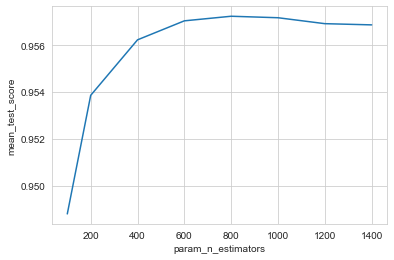

In [63]:
sns.lineplot(data=results, x="param_n_estimators", y='mean_test_score')
plt.show()
plt.close()

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=100; total time=   0.5s
[CV] END ...................................n_estimators=200; total time=   1.4s
[CV] END ...................................n_estimators=200; total time=   0.8s
[CV] END ...................................n_estimators=400; total time=   1.6s
[CV] END ...................................n_estimators=400; total time=   2.5s
[CV] END ...................................n_estimators=600; total time=   2.5s
[CV] END ...................................n_estimators=600; total time=   2.5s
[CV] END ...................................n_estimators=800; total time=   3.4s
[CV] END ...................................n_estimators=800; total time=   3.4s
[CV] END ..................................n_estimators=1000; total time=   5.5s
[CV] END ..................................n_esti

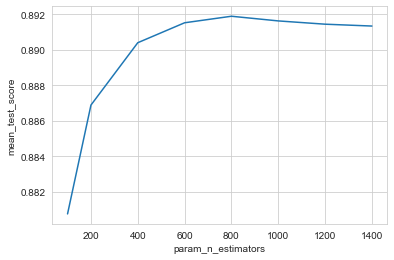

In [65]:
random_state = 100
cas_gbr = GradientBoostingRegressor(random_state=random_state, n_estimators=1000)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400],
}
year_month = train_df["year"] * 10 + train_df["month"]
grid_search = GridSearchCV(estimator=cas_gbr, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search.fit(train_df[features], train_df[targets[1]])
best_cas_gbr = grid_search.best_estimator_
print(grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
sns.lineplot(data=results, x="param_n_estimators", y='mean_test_score')
plt.show()
plt.close()

In [66]:
random_state = 0
registered_params = {'random_state':random_state, 'n_estimators':800}
casual_params = {'random_state':random_state, 'n_estimators':800}
reg_gbr = GradientBoostingRegressor(**registered_params)
cas_gbr = GradientBoostingRegressor(**casual_params)
reg_gbr.fit(train_df[features], train_df[targets[0]])
cas_gbr.fit(train_df[features], train_df[targets[1]])

reg_pred = np.exp(reg_gbr.predict(test_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(cas_gbr.predict(test_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
print(len(prediction))
write_submission(prediction, submission_name=f"test_gbr_submission.csv")

reg_pred = np.exp(reg_gbr.predict(train_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(cas_gbr.predict(train_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
print(len(prediction))
write_submission(prediction, submission_name=f"train_gbr_submission.csv", datetime=train_df["datetime"])

submit_csv(csv_path=f"test_gbr_submission.csv", msg=f"features={features} registered params: random_state=random_state, n_estimators=800 causal params random_state=random_state, n_estimators=800")

6493
10736


In [67]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import LinearRegression

In [86]:
random_state = 100
registered_rf = RandomForestRegressor(random_state=random_state, n_estimators=1200, min_samples_leaf=2)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'min_samples_split': [2, 4, 6, 8, 10]
}
year_month = train_df["year"] * 10 + train_df["month"]
grid_search_registered = GridSearchCV(estimator=registered_rf, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search_registered.fit(train_df[features], train_df[targets[0]])
best_registered_rf = grid_search_registered.best_estimator_

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ................................min_samples_split=2; total time=  19.5s
[CV] END ................................min_samples_split=2; total time=  17.9s
[CV] END ................................min_samples_split=4; total time=  16.8s
[CV] END ................................min_samples_split=4; total time=  15.8s
[CV] END ................................min_samples_split=6; total time=  14.8s
[CV] END ................................min_samples_split=6; total time=  14.7s
[CV] END ................................min_samples_split=8; total time=  14.1s
[CV] END ................................min_samples_split=8; total time=  13.9s
[CV] END ...............................min_samples_split=10; total time=  13.4s
[CV] END ...............................min_samples_split=10; total time=  13.6s


In [87]:
registered_results = pd.DataFrame(grid_search_registered.cv_results_)

In [88]:
registered_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

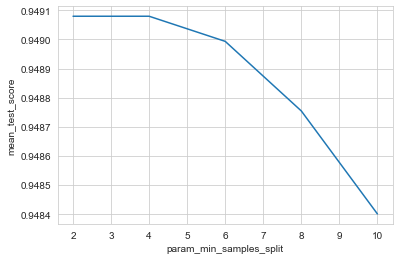

{'min_samples_split': 2}

In [89]:
registered_results = pd.DataFrame(grid_search_registered.cv_results_)

sns.lineplot(data=registered_results, x="param_min_samples_split", y='mean_test_score')
plt.show()
grid_search_registered.best_params_

In [90]:
random_state = 100
casual_rf = RandomForestRegressor(random_state=random_state, n_estimators=1400, min_samples_leaf=2)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'min_samples_split': [2, 4, 6, 8, 10]
}
year_month = train_df["year"] * 10 + train_df["month"]
grid_search_casual = GridSearchCV(estimator=casual_rf, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search_casual.fit(train_df[features], train_df[targets[1]])
best_casual_rf = grid_search_casual.best_estimator_

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ................................min_samples_split=2; total time=  18.1s
[CV] END ................................min_samples_split=2; total time=  18.0s
[CV] END ................................min_samples_split=4; total time=  17.9s
[CV] END ................................min_samples_split=4; total time=  18.0s
[CV] END ................................min_samples_split=6; total time=  16.7s
[CV] END ................................min_samples_split=6; total time=  16.9s
[CV] END ................................min_samples_split=8; total time=  15.9s
[CV] END ................................min_samples_split=8; total time=  16.0s
[CV] END ...............................min_samples_split=10; total time=  15.3s
[CV] END ...............................min_samples_split=10; total time=  15.4s


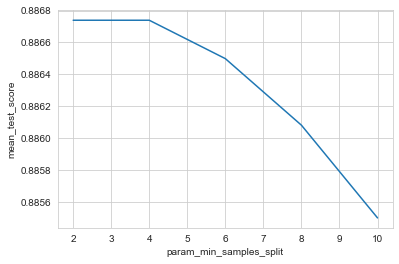

{'min_samples_split': 2}

In [91]:
casual_results = pd.DataFrame(grid_search_casual.cv_results_)
sns.lineplot(data=casual_results, x="param_min_samples_split", y='mean_test_score')
plt.show()
grid_search_casual.best_params_

In [112]:
msg = f"final Random Forest: features={', '.join([x for x in features])} registered -> n_estimators=1000 casual -> n_estimators=1000;  min_samples_split=2."

reg_rf = RandomForestRegressor(random_state=random_state, n_estimators=1000,  min_samples_split=3)
cas_rf = RandomForestRegressor(random_state=random_state, n_estimators=1000,  min_samples_split=3)
reg_rf.fit(train_df[features], train_df[targets[0]])
cas_rf.fit(train_df[features], train_df[targets[1]])

reg_pred = np.exp(reg_rf.predict(test_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(cas_rf.predict(test_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
print(prediction.size)
write_submission(prediction, submission_name=f"test_rf_submission.csv")

reg_pred = np.exp(reg_rf.predict(train_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(cas_rf.predict(train_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
print(prediction.size)
write_submission(prediction, submission_name=f"train_rf_submission.csv", datetime=train_df["datetime"])

submit_csv(csv_path=f"test_rf_submission.csv", msg=msg)

6493
10736


In [100]:
random_state = 100
registered_xgbr = XGBRFRegressor(random_state=random_state)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400]
}
year_month = train_df["year"] * 10 + train_df["month"]
grid_search_registered = GridSearchCV(estimator=registered_xgbr, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search_registered.fit(train_df[features], train_df[targets[0]])
best_registered_xgbr = grid_search_registered.best_estimator_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...................................n_estimators=100; total time=   0.3s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=400; total time=   0.4s
[CV] END ...................................n_estimators=400; total time=   0.9s
[CV] END ...................................n_estimators=600; total time=   3.4s
[CV] END ...................................n_estimators=600; total time=   3.0s
[CV] END ...................................n_estimators=800; total time=   0.9s
[CV] END ...................................n_estimators=800; total time=   0.9s
[CV] END ..................................n_estimators=1000; total time=   1.4s
[CV] END ..................................n_esti

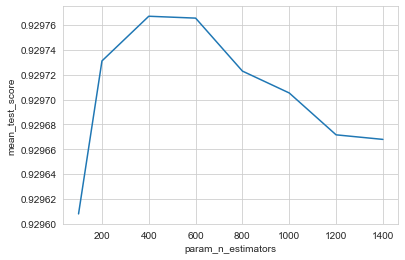

{'n_estimators': 400}

In [101]:
registered_results = pd.DataFrame(grid_search_registered.cv_results_)
sns.lineplot(data=registered_results, x="param_n_estimators", y='mean_test_score')
plt.show()
grid_search_registered.best_params_

In [102]:
random_state = 100
casual_xgbr = XGBRFRegressor(random_state=random_state)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400]
}

year_month = train_df["year"] * 10 + train_df["month"]
grid_search_casual = GridSearchCV(estimator=casual_xgbr, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search_casual.fit(train_df[features], train_df[targets[1]])
best_casual_xgbr = grid_search_casual.best_estimator_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=400; total time=   0.5s
[CV] END ...................................n_estimators=400; total time=   0.6s
[CV] END ...................................n_estimators=600; total time=   0.7s
[CV] END ...................................n_estimators=600; total time=   0.7s
[CV] END ...................................n_estimators=800; total time=   1.0s
[CV] END ...................................n_estimators=800; total time=   1.3s
[CV] END ..................................n_estimators=1000; total time=   1.4s
[CV] END ..................................n_esti

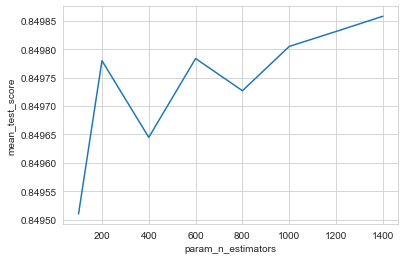

{'n_estimators': 1400}

In [103]:
casual_results = pd.DataFrame(grid_search_casual.cv_results_)
sns.lineplot(data=casual_results, x="param_n_estimators", y='mean_test_score')
plt.show()
grid_search_casual.best_params_

In [104]:
xgbr_registered = XGBRFRegressor(n_estimators=400)
xgbr_casual = XGBRFRegressor(n_estimators=1400)

xgbr_registered.fit(train_df[features], train_df[targets[0]])
xgbr_casual.fit(train_df[features], train_df[targets[1]])

reg_pred = np.exp(xgbr_registered.predict(test_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(xgbr_casual.predict(test_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
write_submission(prediction, submission_name=f"test_xgbrf_submission.csv")

reg_pred = np.exp(xgbr_registered.predict(train_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(xgbr_casual.predict(train_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
write_submission(prediction, submission_name=f"train_xgbrf_submission.csv", datetime=train_df["datetime"])

submit_csv(csv_path=f"test_xgbrf_submission.csv", msg="xgbrf 400, 1400")

In [105]:
random_state = 100
registered_xgbr = XGBRegressor(random_state=random_state)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400]
}
year_month = train_df["year"] * 10 + train_df["month"]
grid_search_registered = GridSearchCV(estimator=registered_xgbr, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search_registered.fit(train_df[features], train_df[targets[0]])
best_registered_xgbr = grid_search_registered.best_estimator_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=400; total time=   0.5s
[CV] END ...................................n_estimators=400; total time=   0.7s
[CV] END ...................................n_estimators=600; total time=   2.5s
[CV] END ...................................n_estimators=600; total time=   1.6s
[CV] END ...................................n_estimators=800; total time=   1.1s
[CV] END ...................................n_estimators=800; total time=   0.9s
[CV] END ..................................n_estimators=1000; total time=   1.3s
[CV] END ..................................n_esti

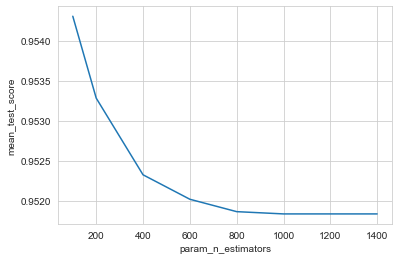

{'n_estimators': 100}

In [106]:
registered_results = pd.DataFrame(grid_search_registered.cv_results_)
sns.lineplot(data=registered_results, x="param_n_estimators", y='mean_test_score')
plt.show()
grid_search_registered.best_params_

In [107]:
random_state = 100
casual_xgbr = XGBRegressor(random_state=random_state)

# kfold object.
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=random_state)

params = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400]
}

year_month = train_df["year"] * 10 + train_df["month"]
grid_search_casual = GridSearchCV(estimator=casual_xgbr, param_grid=params, verbose=2, cv=kf.split(train_df[features], year_month))
grid_search_casual.fit(train_df[features], train_df[targets[1]])
best_casual_xgbr = grid_search_casual.best_estimator_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.4s
[CV] END ...................................n_estimators=400; total time=   0.5s
[CV] END ...................................n_estimators=400; total time=   2.1s
[CV] END ...................................n_estimators=600; total time=   1.4s
[CV] END ...................................n_estimators=600; total time=   0.9s
[CV] END ...................................n_estimators=800; total time=   1.2s
[CV] END ...................................n_estimators=800; total time=   1.3s
[CV] END ..................................n_estimators=1000; total time=   1.9s
[CV] END ..................................n_esti

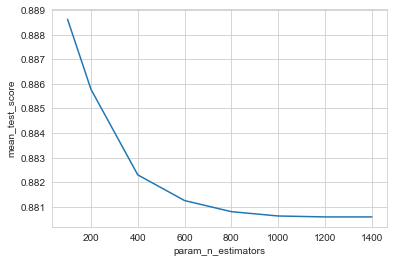

{'n_estimators': 100}

In [108]:
casual_results = pd.DataFrame(grid_search_casual.cv_results_)
sns.lineplot(data=casual_results, x="param_n_estimators", y='mean_test_score')
plt.show()
grid_search_casual.best_params_

In [110]:
xgbr_registered = XGBRegressor(n_estimators=100)
xgbr_casual = XGBRegressor(n_estimators=100)

xgbr_registered.fit(train_df[features], train_df[targets[0]])
xgbr_casual.fit(train_df[features], train_df[targets[1]])

reg_pred = np.exp(xgbr_registered.predict(test_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(xgbr_casual.predict(test_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
write_submission(prediction, submission_name=f"test_xgbr_submission.csv")

reg_pred = np.exp(xgbr_registered.predict(train_df[features])) - 1
reg_pred[reg_pred < 0] = 0
cas_pred = np.exp(xgbr_casual.predict(train_df[features])) - 1
cas_pred[cas_pred < 0] = 0
prediction = cas_pred + reg_pred
write_submission(prediction, submission_name=f"train_xgbr_submission.csv", datetime=train_df["datetime"])

submit_csv(csv_path=f"test_xgbr_submission.csv", msg="xgbr 100, 100")

In [26]:
test_xgbr_preds = pd.read_csv("submission/test_xgbr_submission.csv")
test_rf_preds = pd.read_csv("submission/test_rf_submission.csv")
test_gbr_preds = pd.read_csv("submission/test_gbr_submission.csv")

train_xgbr_preds = pd.read_csv("submission/train_xgbr_submission.csv")
train_rf_preds = pd.read_csv("submission/train_rf_submission.csv")
train_gbr_preds = pd.read_csv("submission/train_gbr_submission.csv")

In [27]:
test_preds = test_xgbr_preds.merge(right=test_gbr_preds, on="datetime", how="left")
test_preds = test_preds.merge(right=test_rf_preds, on="datetime", how="left")
test_preds.columns = ["datetime", "xgbr", "gbr", "rf"]

train_preds = train_xgbr_preds.merge(right=train_gbr_preds, on="datetime", how="left")
train_preds = train_preds.merge(right=train_rf_preds, on="datetime", how="left")
train_preds.columns = ["datetime", "xgbr", "gbr", "rf"]

In [28]:
print(len(train_xgbr_preds), len(train_rf_preds), len(train_gbr_preds))
print(len(test_xgbr_preds), len(test_rf_preds), len(test_gbr_preds))

10736 10736 10736
6493 6493 6493


In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error

for deg in range(2, 5):
    poly = PolynomialFeatures(degree=deg, include_bias=True, interaction_only=False)
    train_poly_features = poly.fit_transform(train_preds[["xgbr", "gbr", "rf"]])
    train_poly_features = pd.DataFrame(train_poly_features)

    test_poly_features = poly.fit_transform(test_preds[["xgbr", "gbr", "rf"]])
    test_poly_features = pd.DataFrame(test_poly_features)

    linear_model = LinearRegression(fit_intercept=False)
    linear_model.fit(train_poly_features, train_df["count"])

    prediction = linear_model.predict(train_poly_features)
    msle = mean_squared_log_error(prediction, train_df["count"])

    prediction_datetime = test_preds.drop(["xgbr", "gbr", "rf"], axis=1)
    # test_preds = pd.concat([prediction_datetime, test_poly_features], axis=1)
    test_prediction = linear_model.predict(test_poly_features)
    test_prediction[test_prediction < 0] = 0
    write_submission(test_prediction, submission_name=f"ensemble_final_{deg}.csv", datetime=prediction_datetime)
    submit_csv(csv_path=f"ensemble_final_{deg}.csv", msg=f"deg={deg}")

In [118]:
test_preds

,datetime,xgbr,gbr,rf
0,2011-01-20 00:00:00,11.313439,9.818926,13.344430
1,2011-01-20 01:00:00,4.431489,5.019686,6.337983
2,2011-01-20 02:00:00,3.513600,2.846905,4.091419
3,2011-01-20 03:00:00,3.401007,2.194145,3.785791
4,2011-01-20 04:00:00,3.336918,2.204460,3.434057
...,...,...,...,...
6488,2012-12-31 19:00:00,230.749790,252.848416,230.776112
6489,2012-12-31 20:00:00,154.742500,178.828429,170.925351
6490,2012-12-31 21:00:00,118.089760,125.746905,111.823911
6491,2012-12-31 22:00:00,75.629700,81.573751,92.669420


In [137]:
for alpha in np.arange(0.05, 1.1, 0.05):
    test_preds["count"] = test_preds["xgbr"] * 0. + test_preds["gbr"] * (1-alpha) + test_preds["rf"] * alpha
    preds = np.array(test_preds[["count"]].values).flatten()
    prediction_datetime = test_preds.drop(["xgbr", "gbr", "rf", "count"], axis=1)
    write_submission(preds, submission_name=f"merge_alpha_{alpha}.csv", datetime=test_preds["datetime"])
    submit_csv(csv_path=f"merge_alpha_{alpha}.csv", msg=f"alpha={alpha} gbr * (1-alpha) + alpha * rf")

In [29]:
for alpha in np.arange(0.2, 1.1, 0.2):
    for zeta in np.arange(0, (1-alpha), 0.2):
        test_preds["count"] = test_preds["xgbr"] * zeta + test_preds["gbr"] * alpha + test_preds["rf"] * (1-zeta)
        preds = np.array(test_preds[["count"]].values).flatten()
        prediction_datetime = test_preds.drop(["xgbr", "gbr", "rf", "count"], axis=1)
        name = f"merge_xgbr_rf_alpha_{alpha}_zeta_{zeta}.csv"
        write_submission(preds, submission_name=name, datetime=test_preds["datetime"])
        submit_csv(csv_path=name, msg=f"alpha={alpha} zeta={zeta} test_preds['xgbr'] * {zeta} + test_preds['gbr'] * {alpha} + test_preds['rf'] * (1-{zeta})")